# MODELLING SUNSPOTS

## 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points


# Reading in the data

### SOURCE OF DATA: https://wwwbis.sidc.be/silso/datafiles 

In [79]:
data = pd.read_csv('clean_sunspot_data.csv')
print(data.head())

   Year  Month  Year_Month  Number_Of_Sunspots
0  1749      1     1749.04                96.7
1  1749      2     1749.12               104.3
2  1749      3     1749.20               116.7
3  1749      4     1749.29                92.8
4  1749      5     1749.37               141.7


In [80]:
number_of_sunspots = data['Number_Of_Sunspots']

# We want to convert all of our sunspots from strings to float types
i=1
sunspots=[]
while i < len(data):
    sunspots.append(float(number_of_sunspots[i]))
    i+=1

# Here we plot the sunspots over time 

* We notice that there are very well defined cycles

* We want to build a model for what these cycles might look like

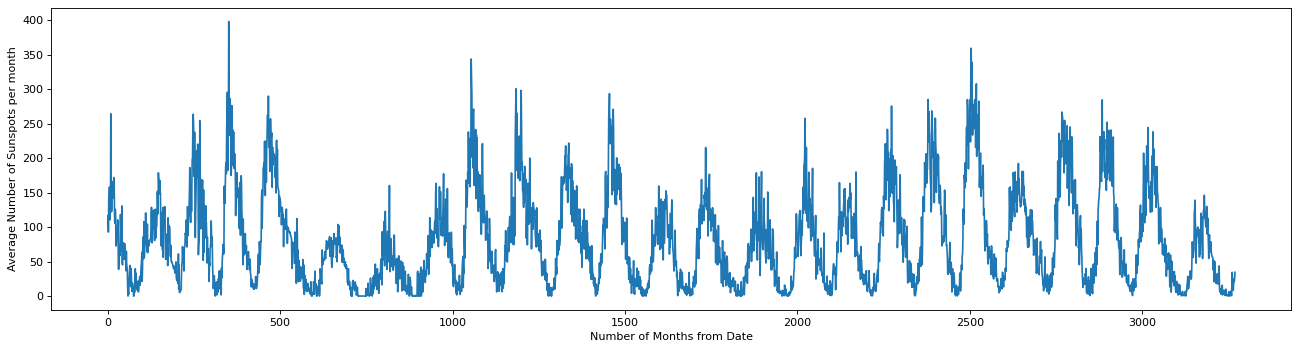

In [81]:
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(sunspots)
plt.xlabel('Number of Months from Date')
plt.ylabel('Average Number of Sunspots per month')

plt.show()

# The first step is to remove the first 100 points of data as they record what appears to be an incomplete cycle

* We now note that there are 23 peaks in the data shown below:

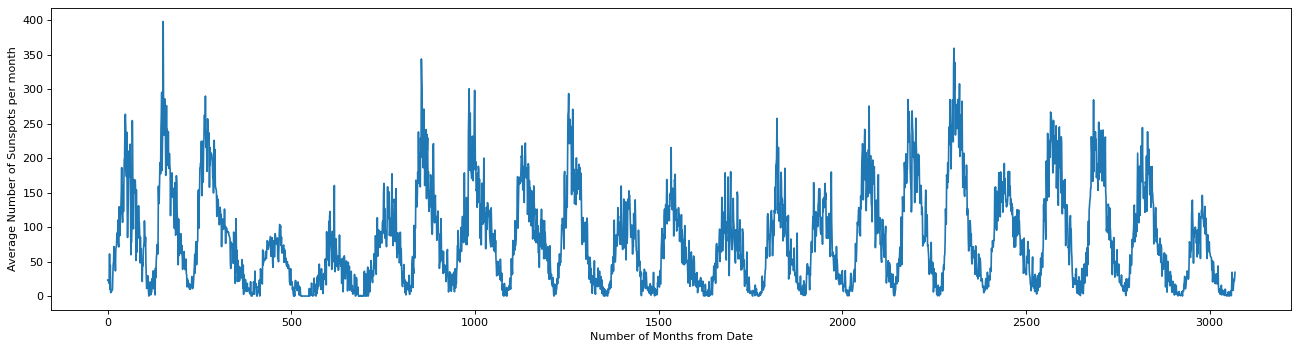

In [82]:
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(sunspots[200:])
plt.xlabel('Number of Months from Date')
plt.ylabel('Average Number of Sunspots per month')

plt.show()

# We now want to break up these cycles so that they can be analysed as a group





### To do this, we form a new cycle every time both of the following conditions are satisfied:
 * Filter 1: if the height is less than 5, and
 * Filter 2: if the length is more than 20 


In [83]:
clean_data = sunspots[200:]

counter1=0
counter2=0


values=[] # Holder for each cycle as we add it to the list
combined_list = [] # This is the list that store each of the cyclues

while counter1 < len(clean_data):
    values.append(clean_data[counter1])

    if (clean_data[counter1] < 5) & (counter2 > 20):
        combined_list.append(values)
        values=[]
        counter2=0

    counter1+=1
    counter2+=1

print(len(combined_list))

35


# When we plot the result of our cleaning, it is clear that we missed two cycles

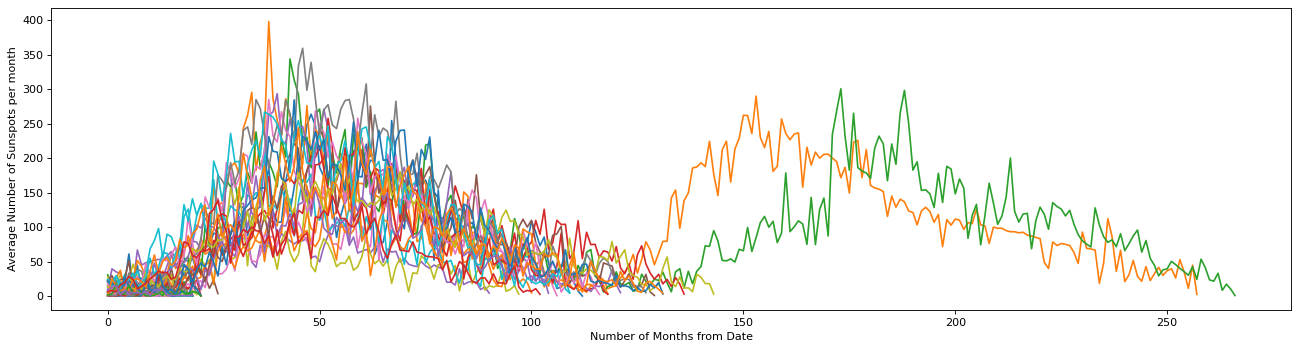

In [84]:
plt.figure(figsize=(20, 5), dpi=80)

i=0
while i < len(combined_list):

    plt.plot(combined_list[i])
    
    i+=1

plt.xlabel('Number of Months from Date')
plt.ylabel('Average Number of Sunspots per month')
plt.show()

In [85]:
i=0
counter=0
new_list = []
while i < len(combined_list):

    if len(combined_list[i]) > 40:
        new_list.append(combined_list[i]) 
    
    else:
        counter+=1
    
    i+=1

i=0
while i < counter:
    
    if i == counter:
        new_list[i] = new_list[i] + combined_list[i]
    
    i+=1

# These are the cycles we want to break up into two
new_list.append(combined_list[1][0:100])
new_list.append(combined_list[1][100:])
new_list.append(combined_list[5][0:120])
new_list.append(combined_list[5][120:])

# We remove them here from the data
new_list.pop(1)
new_list.pop(4)


[21.5,
 1.7,
 11.6,
 9.5,
 19.3,
 12.5,
 9.8,
 16.6,
 8.2,
 30.1,
 6.5,
 2.4,
 14.8,
 13.1,
 14.4,
 6.6,
 19.2,
 41.3,
 50.9,
 57.5,
 12.4,
 40.7,
 32.7,
 102.4,
 72.6,
 55.2,
 99.6,
 98.5,
 168.0,
 158.6,
 166.7,
 129.3,
 147.6,
 179.4,
 163.7,
 238.0,
 185.7,
 207.9,
 194.6,
 179.6,
 158.5,
 228.9,
 201.5,
 343.8,
 313.4,
 292.6,
 224.3,
 230.3,
 186.1,
 263.4,
 271.2,
 223.5,
 160.4,
 206.2,
 178.4,
 216.1,
 241.5,
 141.3,
 234.5,
 211.1,
 229.4,
 157.6,
 180.4,
 131.3,
 122.7,
 151.5,
 129.2,
 132.9,
 175.9,
 170.8,
 129.5,
 102.9,
 89.6,
 91.2,
 141.3,
 218.8,
 221.1,
 151.5,
 114.7,
 106.2,
 135.4,
 146.1,
 112.9,
 109.8,
 115.4,
 80.9,
 101.0,
 96.4,
 123.3,
 91.7,
 90.4,
 89.5,
 40.1,
 49.9,
 49.6,
 66.9,
 112.4,
 92.8,
 51.4,
 65.4,
 60.9,
 47.4,
 32.9,
 64.8,
 34.0,
 36.8,
 36.2,
 44.9,
 41.4,
 34.2,
 21.0,
 44.4,
 30.6,
 63.5,
 67.5,
 29.3,
 22.2,
 5.9,
 13.9,
 15.8,
 35.1,
 17.6,
 15.9,
 19.6,
 6.9,
 8.9,
 31.7,
 21.2,
 15.7,
 24.5,
 22.5,
 34.6,
 19.2,
 6.2,
 35.2,
 39.7,


# Plotting the end result of our cleaning

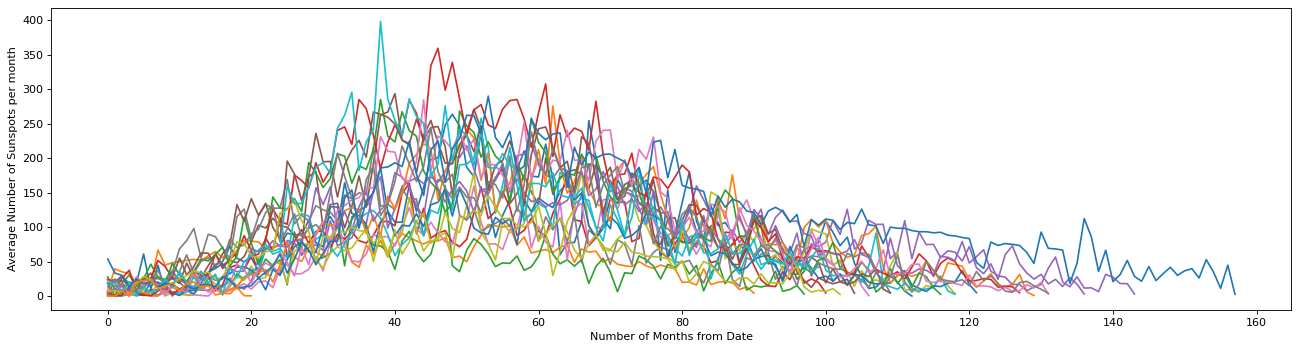

In [86]:
plt.figure(figsize=(20, 5), dpi=80)

i=0
while i < len(new_list):

    plt.plot(new_list[i])
    
    plt.xlabel('Number of Months from Date')
    plt.ylabel('Average Number of Sunspots per month')

    i+=1

plt.show()

# Averaging the values for each month
* In this step we add each value in the index to a list
* We calcualte the average at each index

In [87]:
values=[]
new_values=[]

i=0
average_values=[]
while i < 158:
    j=0
    avg=0
    counter=0
    values=[]

    while j < len(new_list):

        if i < len(new_list[j]):            
            avg+=new_list[j][i]
            values.append(new_list[j][i])
            counter+=1

        j+=1

    new_values.append(values)
    average_values.append(np.round(avg/counter,2))

    i+=1

# Calculate the standard deviation for each month

In [88]:
std = []

i=0
while i < len(new_values):
    num=0
    num=np.std(new_values[i])
    num=round(num,2)
    std.append(num)
    i+=1


plus_std=[]
minus_std=[]

i=0
while i < len(average_values):
    
    plus_std.append(average_values[i]+std[i])
    minus_std.append(average_values[i]-std[i])
    
    i+=1

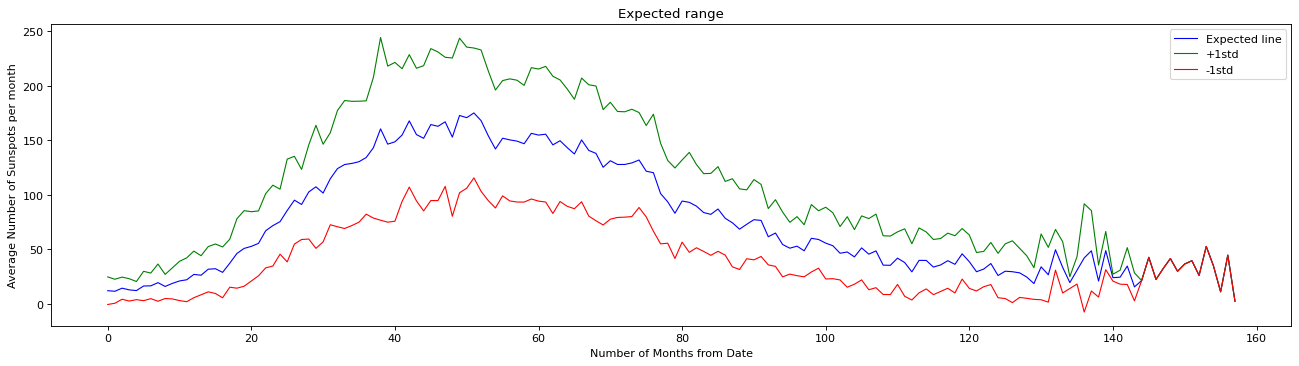

In [89]:
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(average_values,linewidth=1,color='blue')
plt.plot(plus_std,linewidth=1,color='green')
plt.plot(minus_std,linewidth=1,color='red')
plt.xlabel('Number of Months from Date')
plt.ylabel('Average Number of Sunspots per month')
plt.legend(['Expected line','+1std','-1std',])
plt.title('Expected range')

plt.show()

# Plotting this against the data

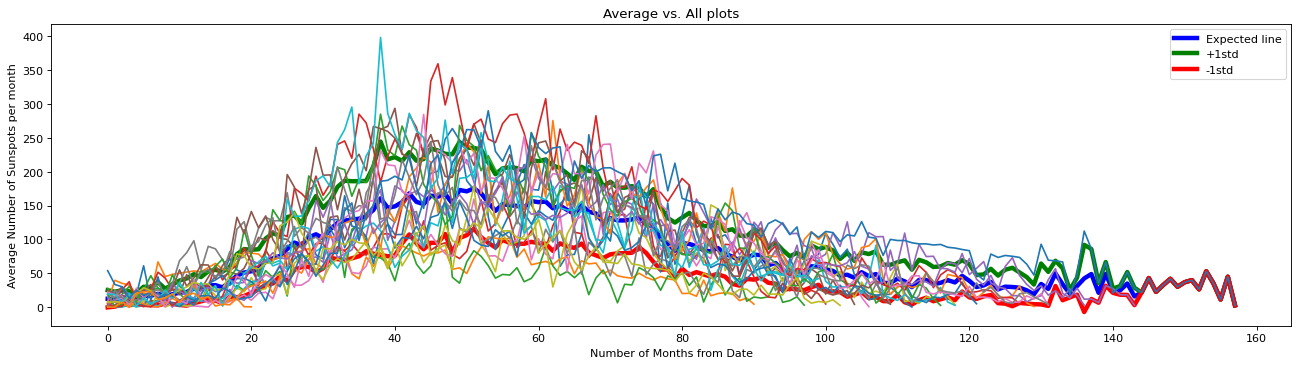

In [90]:
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(average_values,linewidth=4,color='blue')
plt.plot(plus_std,linewidth=4,color='green')
plt.plot(minus_std,linewidth=4,color='red')
plt.legend(['Expected line','+1std','-1std',])
plt.xlabel('Number of Months from Date')
plt.ylabel('Average Number of Sunspots per month')
plt.title('Average vs. All plots')

i=0
while i < len(new_list):
    plt.plot(new_list[i])
    i+=1

plt.show()


# Plotting the expected curve against history

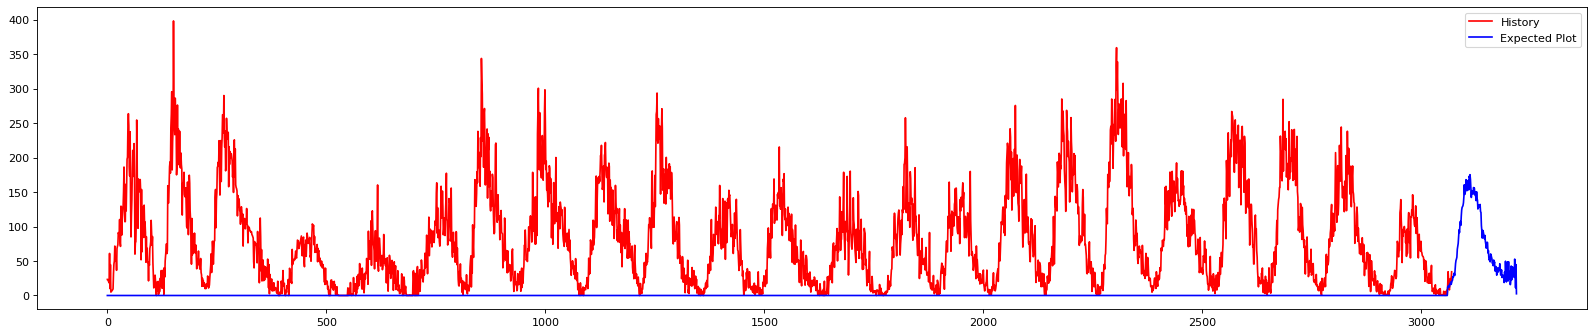

In [91]:
# 3070
calculate=[0]*3060
calculate = calculate + average_values

plt.figure(figsize=(25, 5), dpi=80)
plt.plot(clean_data,color='red')
plt.plot(calculate,color='blue')
plt.legend(['History','Expected Plot'])

plt.show()

# Taking a closer look at the current trajectory
* Based on the chart below we would expect the current trend to continue until 

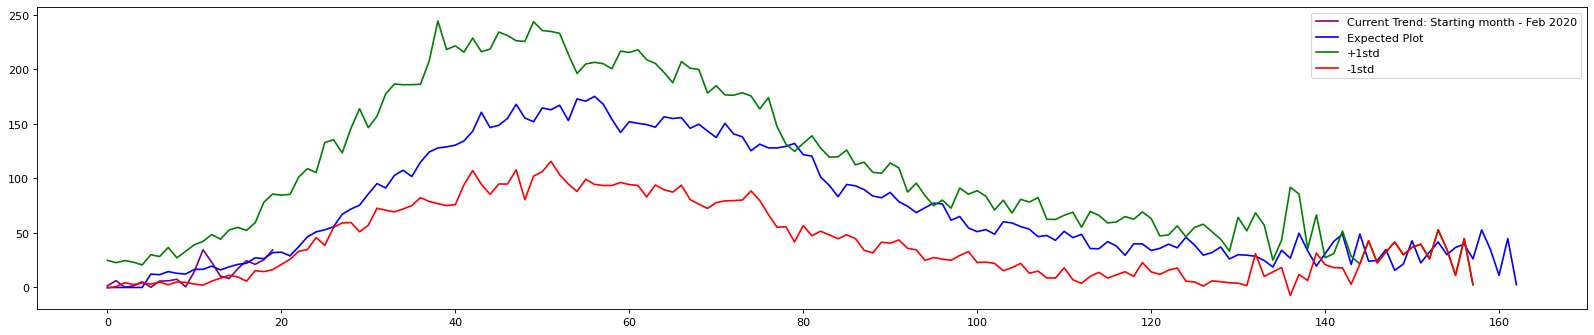

In [92]:
# The number of cells in history is: 3070

plt.figure(figsize=(25, 5), dpi=80)
plt.plot(clean_data[3050:],color='purple')
plt.plot(calculate[3055:],color='blue')
plt.plot(plus_std,color='green')
plt.plot(minus_std,color='red')
plt.legend(['Current Trend: Starting month - Feb 2020','Expected Plot','+1std','-1std'])

plt.show()

### Saving some of our data as a CSV for later

In [93]:
i=0
X=[]
Y=[]
while i < len(new_values):
    j=0
    while j < len(new_values[i]):
        Y.append(new_values[i][j])
        X.append(i+1)
        j+=1

    i+=1

# Saving our data as numpy arrays - we need this so we can use the model functions
X_numpy_array = np.asarray(X).reshape(-1,1)
Y_numpy_array = np.asarray(Y).reshape(-1,1)

In [94]:
print(X_numpy_array.shape)
print(Y_numpy_array.shape)

(2497, 1)
(2497, 1)


In [95]:
df = pd.DataFrame.from_dict({'X':X,'Y':Y})
df.to_csv('test.csv', header=True, index=False)

# Regression Splines

### We have seen in graphs before that sunspots a cyclical

In [96]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.linear_model import LinearRegression # to build a LR model for comparison
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization 
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points

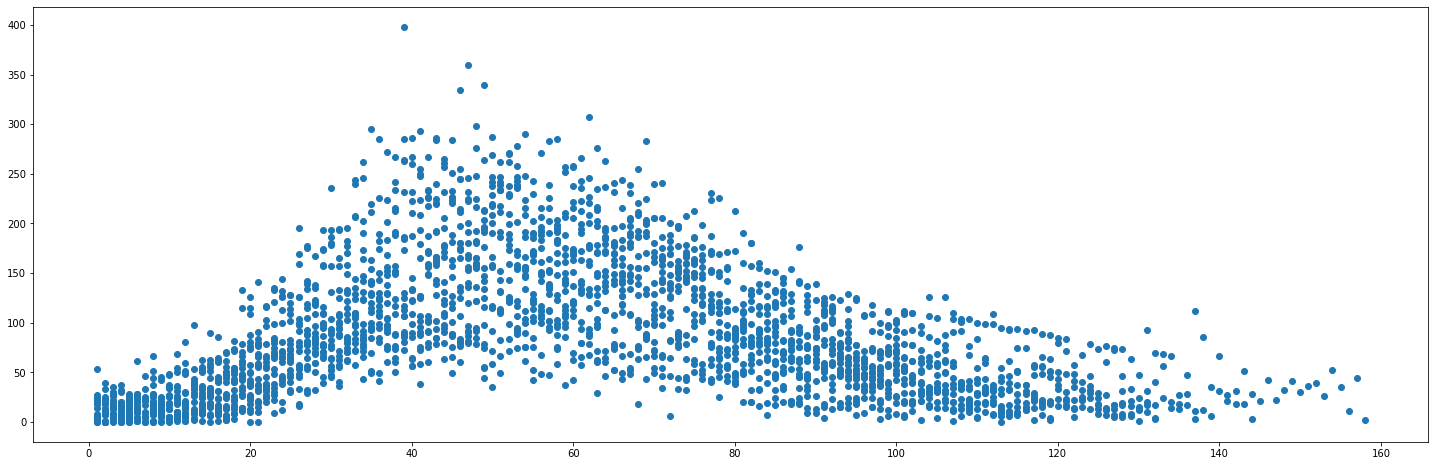

In [97]:
plt.figure(figsize=(25, 8))
plt.scatter(X,Y)
plt.show()

In [98]:
# Read in data
df = pd.read_csv('test.csv', encoding='utf-8')

In [99]:
# # Create a scatter plot
# fig = px.scatter(df, x=df['X'], y=df['Y'], opacity=0.8, color_discrete_sequence=['black'])

# # Add the prediction line
# # fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Linear Regression', line=dict(color='limegreen')))
# fig.add_traces(go.Scatter(x=y_hat1[:,0], y=y_hat1[:,1], name='LOWESS, frac=2/3', line=dict(color='red')))
# fig.add_traces(go.Scatter(x=y_hat2[:,0], y=y_hat2[:,1], name='LOWESS, frac=1/5', line=dict(color='orange')))

# # Change chart background color
# fig.update_layout(dict(plot_bgcolor = 'white'))

# # Update axes lines
# fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
#                  zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
#                  showline=True, linewidth=1, linecolor='black')

# fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
#                  zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
#                  showline=True, linewidth=1, linecolor='black')

# # Set figure title
# fig.update_layout(title=dict(text="LOWESS MODEL FOR SUNSPOTS", font=dict(color='black')))

# # Update marker size
# fig.update_traces(marker=dict(size=3))

# fig.show()

In [100]:
# Create a scatter plot
fig = px.scatter(df, x=df['X'], y=df['Y'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Sunspots", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [101]:
# ------- Select variables -------
# x values for Linear Regression
X=df['X'].values.reshape(-1,1) # Note, we need X to be a 2D array, hence reshape
# x values for LOWESS
x=df['X'].values 
# y values for both
y=df['Y'].values


# ------- Linear Regression -------
# Define and fit the model
model1 = LinearRegression()
LR = model1.fit(X, y)

# Predict a few points with Linear Regression model for the grpah
# Create 20 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 20) 
# Predict y values for our set of X values
y_range = model1.predict(x_range.reshape(-1, 1))


# ------- LOWESS -------
# Generate y_hat values using lowess, try a couple values for hyperparameters
y_hat1 = sm.nonparametric.lowess(y, x) # note, default frac=2/3
y_hat2 = sm.nonparametric.lowess(y, x, frac=1/25)

In [102]:
# Create a scatter plot
fig = px.scatter(df, x=df['X'], y=df['Y'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Add the prediction line
# fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=y_hat1[:,0], y=y_hat1[:,1], name='LOWESS, frac=2/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=y_hat2[:,0], y=y_hat2[:,1], name='LOWESS, frac=1/25', line=dict(color='orange')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Sunspots LOWESS PREDICTIONS", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()